# PCA


- step1. normalization
- step2. covariance matrix
- step3. eigen stuff (eigen vector, eigen - value)
- step4. principa component
- step5. reconstructing the original data

#### check eigen value and vector

### Data Set

```
x = np.array([170, 174, 172, 176, 168, 166])
y = np.array([68, 80, 79, 86, 60, 61])
```

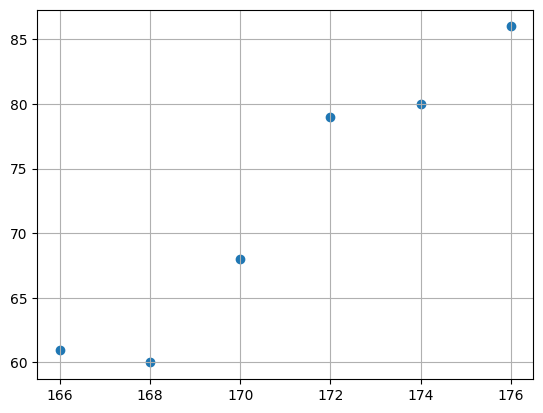

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([170, 174, 172, 176, 168, 166])
y = np.array([68, 80, 79, 86, 60, 61])

plt.scatter(x, y)
plt.grid(True)
plt.show()

In [ ]:
data = np.column_stack((x, y))
print(data)
np.mean(data, axis = 1)

[[170  68]
 [174  80]
 [172  79]
 [176  86]
 [168  60]
 [166  61]]


array([119. , 127. , 125.5, 131. , 114. , 113.5])

### step1. Normalization




In [ ]:
# Z-score
# standardization

mean_data = np.mean(data, axis=0)
stddev_data = np.std(data, axis=0)
centered_data = (data - mean_data) / stddev_data
centered_data

array([[-0.29277002, -0.43723732],
       [ 0.87831007,  0.77357371],
       [ 0.29277002,  0.67267279],
       [ 1.46385011,  1.37897923],
       [-0.87831007, -1.24444467],
       [-1.46385011, -1.14354375]])

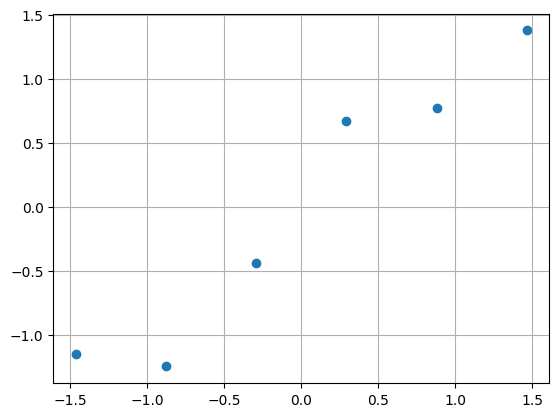

In [ ]:
plt.scatter(centered_data[:,0], centered_data[:,1])
plt.grid(True)
plt.show()

### step2. Covariance Matrix

In [ ]:
cov_matrix = np.cov(centered_data, rowvar = False)
print(cov_matrix)

[[1.2        1.15799796]
 [1.15799796 1.2       ]]


### step 3. Eigen Value & Eigen Vector

In [ ]:
egi_values, eig_vectors = np.linalg.eig(cov_matrix)
print(egi_values)
print(eig_vectors)

[2.35799796 0.04200204]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### step 4. Pincipal Component

In [ ]:
principal_component = eig_vectors[:, np.argmax(egi_values)]
print(principal_component)

print(centered_data)
projected_data = centered_data @ principal_component
print(projected_data)

[0.70710678 0.70710678]
[[-0.29277002 -0.43723732]
 [ 0.87831007  0.77357371]
 [ 0.29277002  0.67267279]
 [ 1.46385011  1.37897923]
 [-0.87831007 -1.24444467]
 [-1.46385011 -1.14354375]]
[-0.51619314  1.16805822  0.68267116  2.0101839  -1.50101427 -1.84370588]


### step 5. reconstructing the original data

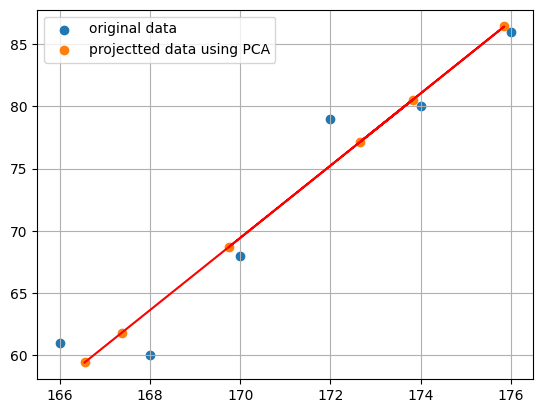

In [ ]:
plt.scatter(x, y, label='original data')

pca_data_x = mean_data[0] + projected_data * principal_component[0] * stddev_data[0]
pca_data_y = mean_data[1] + projected_data * principal_component[1] * stddev_data[1]
plt.scatter(pca_data_x, pca_data_y, label='projectted data using PCA')
plt.plot(pca_data_x, pca_data_y, 'r-')

plt.grid(True)
plt.legend()
plt.show()